In [2]:
import sys
from __future__ import division

In [30]:
import numpy as np
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.sympy import *

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

The phasor.utilities.ipynb.autoreload extension is already loaded. To reload it, use:
  %reload_ext phasor.utilities.ipynb.autoreload
Populating the interactive namespace from numpy and matplotlib


In [4]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 

import scipy.signal

b'2017-09-29 14:18:38 -0400 (bbb2b427cdfd3d3fc1a626fa4fa5404882cc9820)'


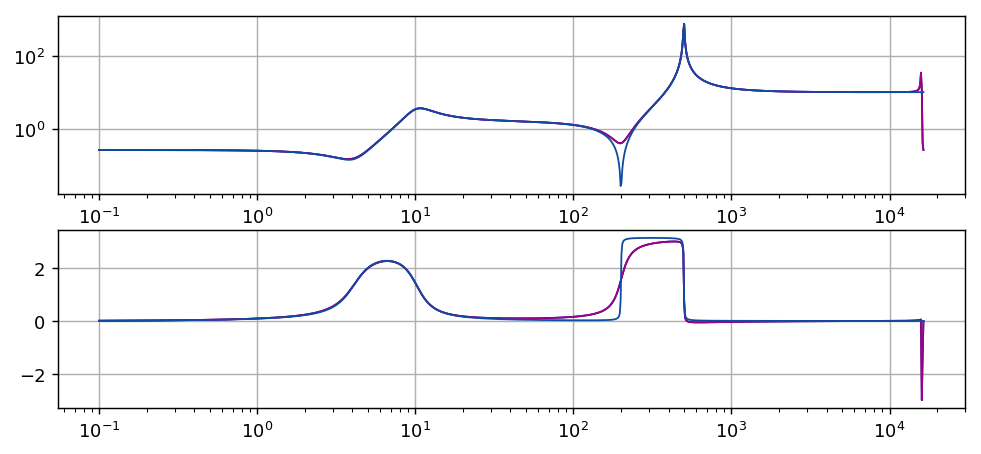

In [5]:
F_AC = np.linspace(0, 16384, 1000)
F_AC = logspaced(.1, 16384, 1000)
    
ZPKs = (
    [
        2 * np.pi * (-1 + 4j), 
        2 * np.pi * (-1 - 4j),
        2 * np.pi * (-1 + 200j), 
        2 * np.pi * (-1 - 200j)
    ], 
    [
        2 * np.pi * (-2 + 10j), 
        2 * np.pi * (-2 - 10j),
        2 * np.pi * (-2 + 500j), 
        2 * np.pi * (-2 - 500j),
    ], 
    10
)

F_nyquist = 16384 / 2
z,p,k, dt = scipy.signal.cont2discrete(ZPKs, dt = 1 / (2 * F_nyquist))
ZPKz = z,p,k

b,a = scipy.signal.zpk2tf(*ZPKz)


Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz_zpk(*ZPKz , worN = F_AC / F_nyquist * np.pi)
F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

w, h = scipy.signal.freqz(b, a , worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

w, h = scipy.signal.freqs_zpk(*ZPKs , worN = F_AC  * np.pi * 2)
#F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'cont')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'cont')

In [6]:
order_b = 10
order_a = 10
Z = np.exp(-1j * np.pi * F_AC / F_nyquist)
Z_a = np.vstack([Z**j for j in range(order_a)]).T
Z_b = np.vstack([Z**j for j in range(order_b)]).T

In [7]:
Z_a.shape

In [8]:
M_b = np.einsum('ij,i->ij', Z_b, 1/F_exact)
M_a = Z_a
M_b2 = Z_b
M_a2 = np.einsum('ij,i->ij', Z_a, F_exact)

In [53]:
X = np.block([[M_b, -M_a], ])
red1 = np.einsum('ji,jk->ki', X.conjugate(), X)
X = np.block([[M_b2, -M_a2]])
red2 = np.einsum('ji,jk->ki', X.conjugate(), X)
X = np.block([[M_b, -M_a], [M_b2, -M_a2]])
red3 = np.einsum('ji,jk->ki', X.conjugate(), X)
red4 = np.einsum('ij,jk->ik', red2, red2)
red.shape
X.shape

In [54]:
@np.vectorize
def fmt(v):
    return "{0:.2f}".format(v)
    
def matrix_markdown(mat, fmt = fmt):
    display(Markdown(
        tabulate.tabulate(
            fmt(mat),
            tablefmt='pipe',
            headers = [''] * red1.shape[0]
    )))
    return

matrix_markdown(red1)
matrix_markdown(red2)

matrix_markdown(red1 / red2)

|                  |                  |                  |                  |                  |                  |                  |                  |                  |                  |                  |                  |                  |                  |                  |                  |                  |                  |                  |                  |
|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|:-----------------|
| 6751.94+0.00j    | 6749.51+17.95j   | 6747.68+34.77j   | 6745.19+51.48j   | 6741.88+68.03j   | 6737.73+84.37j   | 6732.74+100.43j  | 6726.91+116.15j  | 6720.27+131.46j  | 6712.86+146.31j  | -1355.38+481.53j | -1340.96+469.46j | -1341.92+468.00j | -1345.47+466.19j | -1350.12+463.76j | -1355.29+460.66j | -1360.71+456.89j | -1366.18+452.47j | -1371.56+447.44j | -1376.75+441.83j |
| 6749.51-17.95j   | 6751.94+0.00j    | 6749.51+17.95j   | 6747.68+34.77j   | 6745.19+51.48j   | 6741.88+68.03j   | 6737.73+84.37j   | 6732.74+100.43j  | 6726.91+116.15j  | 6720.27+131.46j  | -1330.07+493.37j | -1355.38+481.53j | -1340.96+469.46j | -1341.92+468.00j | -1345.47+466.19j | -1350.12+463.76j | -1355.29+460.66j | -1360.71+456.89j | -1366.18+452.47j | -1371.56+447.44j |
| 6747.68-34.77j   | 6749.51-17.95j   | 6751.94+0.00j    | 6749.51+17.95j   | 6747.68+34.77j   | 6745.19+51.48j   | 6741.88+68.03j   | 6737.73+84.37j   | 6732.74+100.43j  | 6726.91+116.15j  | -1319.85+494.01j | -1330.07+493.37j | -1355.38+481.53j | -1340.96+469.46j | -1341.92+468.00j | -1345.47+466.19j | -1350.12+463.76j | -1355.29+460.66j | -1360.71+456.89j | -1366.18+452.47j |
| 6745.19-51.48j   | 6747.68-34.77j   | 6749.51-17.95j   | 6751.94+0.00j    | 6749.51+17.95j   | 6747.68+34.77j   | 6745.19+51.48j   | 6741.88+68.03j   | 6737.73+84.37j   | 6732.74+100.43j  | -1312.24+494.25j | -1319.85+494.01j | -1330.07+493.37j | -1355.38+481.53j | -1340.96+469.46j | -1341.92+468.00j | -1345.47+466.19j | -1350.12+463.76j | -1355.29+460.66j | -1360.71+456.89j |
| 6741.88-68.03j   | 6745.19-51.48j   | 6747.68-34.77j   | 6749.51-17.95j   | 6751.94+0.00j    | 6749.51+17.95j   | 6747.68+34.77j   | 6745.19+51.48j   | 6741.88+68.03j   | 6737.73+84.37j   | -1305.86+494.38j | -1312.24+494.25j | -1319.85+494.01j | -1330.07+493.37j | -1355.38+481.53j | -1340.96+469.46j | -1341.92+468.00j | -1345.47+466.19j | -1350.12+463.76j | -1355.29+460.66j |
| 6737.73-84.37j   | 6741.88-68.03j   | 6745.19-51.48j   | 6747.68-34.77j   | 6749.51-17.95j   | 6751.94+0.00j    | 6749.51+17.95j   | 6747.68+34.77j   | 6745.19+51.48j   | 6741.88+68.03j   | -1300.24+494.48j | -1305.86+494.38j | -1312.24+494.25j | -1319.85+494.01j | -1330.07+493.37j | -1355.38+481.53j | -1340.96+469.46j | -1341.92+468.00j | -1345.47+466.19j | -1350.12+463.76j |
| 6732.74-100.43j  | 6737.73-84.37j   | 6741.88-68.03j   | 6745.19-51.48j   | 6747.68-34.77j   | 6749.51-17.95j   | 6751.94+0.00j    | 6749.51+17.95j   | 6747.68+34.77j   | 6745.19+51.48j   | -1295.14+494.56j | -1300.24+494.48j | -1305.86+494.38j | -1312.24+494.25j | -1319.85+494.01j | -1330.07+493.37j | -1355.38+481.53j | -1340.96+469.46j | -1341.92+468.00j | -1345.47+466.19j |
| 6726.91-116.15j  | 6732.74-100.43j  | 6737.73-84.37j   | 6741.88-68.03j   | 6745.19-51.48j   | 6747.68-34.77j   | 6749.51-17.95j   | 6751.94+0.00j    | 6749.51+17.95j   | 6747.68+34.77j   | -1290.45+494.63j | -1295.14+494.56j | -1300.24+494.48j | -1305.86+494.38j | -1312.24+494.25j | -1319.85+494.01j | -1330.07+493.37j | -1355.38+481.53j | -1340.96+469.46j | -1341.92+468.00j |
| 6720.27-131.46j  | 6726.91-116.15j  | 6732.74-100.43j  | 6737.73-84.37j   | 6741.88-68.03j   | 6745.19-51.48j   | 6747.68-34.77j   | 6749.51-17.95j   | 6751.94+0.00j    | 6749.51+17.95j   | -1286.07+494.70j | -1290.45+494.63j | -1295.14+494.56j | -1300.24+494.48j | -1305.86+494.38j | -1312.24+494.25j | -1319.85+494.01j | -1330.07+493.37j | -1355.38+481.53j | -1340.96+469.46j |
| 6712.86-146.31j  | 6720.27-131.46j  | 6726.91-116.15j  | 6732.74-100.43j  | 6737.73-84.37j   | 6741.88-68.03j   | 6745.19-51.48j   | 6747.68-34.77j   | 6749.51-17.95j   | 6751.94+0.00j    | -1281.95+494.78j | -1286.07+494.70j | -1290.45+494.63j | -1295.14+494.56j | -1300.24+494.48j | -1305.86+494.38j | -1312.24+494.25j | -1319.85+494.01j | -1330.07+493.37j | -1355.38+481.53j |
| -1355.38-481.53j | -1330.07-493.37j | -1319.85-494.01j | -1312.24-494.25j | -1305.86-494.38j | -1300.24-494.48j | -1295.14-494.56j | -1290.45-494.63j | -1286.07-494.70j | -1281.95-494.78j | 1000.00+0.00j    | 797.18+118.00j   | 740.87+124.16j   | 707.42+126.32j   | 683.58+127.41j   | 665.06+128.07j   | 649.92+128.51j   | 637.10+128.83j   | 626.00+129.07j   | 616.21+129.25j   |
| -1340.96-469.46j | -1355.38-481.53j | -1330.07-493.37j | -1319.85-494.01j | -1312.24-494.25j | -1305.86-494.38j | -1300.24-494.48j | -1295.14-494.56j | -1290.45-494.63j | -1286.07-494.70j | 797.18-118.00j   | 1000.00+0.00j    | 797.18+118.00j   | 740.87+124.16j   | 707.42+126.32j   | 683.58+127.41j   | 665.06+128.07j   | 649.92+128.51j   | 637.10+128.83j   | 626.00+129.07j   |
| -1341.92-468.00j | -1340.96-469.46j | -1355.38-481.53j | -1330.07-493.37j | -1319.85-494.01j | -1312.24-494.25j | -1305.86-494.38j | -1300.24-494.48j | -1295.14-494.56j | -1290.45-494.63j | 740.87-124.16j   | 797.18-118.00j   | 1000.00+0.00j    | 797.18+118.00j   | 740.87+124.16j   | 707.42+126.32j   | 683.58+127.41j   | 665.06+128.07j   | 649.92+128.51j   | 637.10+128.83j   |
| -1345.47-466.19j | -1341.92-468.00j | -1340.96-469.46j | -1355.38-481.53j | -1330.07-493.37j | -1319.85-494.01j | -1312.24-494.25j | -1305.86-494.38j | -1300.24-494.48j | -1295.14-494.56j | 707.42-126.32j   | 740.87-124.16j   | 797.18-118.00j   | 1000.00+0.00j    | 797.18+118.00j   | 740.87+124.16j   | 707.42+126.32j   | 683.58+127.41j   | 665.06+128.07j   | 649.92+128.51j   |
| -1350.12-463.76j | -1345.47-466.19j | -1341.92-468.00j | -1340.96-469.46j | -1355.38-481.53j | -1330.07-493.37j | -1319.85-494.01j | -1312.24-494.25j | -1305.86-494.38j | -1300.24-494.48j | 683.58-127.41j   | 707.42-126.32j   | 740.87-124.16j   | 797.18-118.00j   | 1000.00+0.00j    | 797.18+118.00j   | 740.87+124.16j   | 707.42+126.32j   | 683.58+127.41j   | 665.06+128.07j   |
| -1355.29-460.66j | -1350.12-463.76j | -1345.47-466.19j | -1341.92-468.00j | -1340.96-469.46j | -1355.38-481.53j | -1330.07-493.37j | -1319.85-494.01j | -1312.24-494.25j | -1305.86-494.38j | 665.06-128.07j   | 683.58-127.41j   | 707.42-126.32j   | 740.87-124.16j   | 797.18-118.00j   | 1000.00+0.00j    | 797.18+118.00j   | 740.87+124.16j   | 707.42+126.32j   | 683.58+127.41j   |
| -1360.71-456.89j | -1355.29-460.66j | -1350.12-463.76j | -1345.47-466.19j | -1341.92-468.00j | -1340.96-469.46j | -1355.38-481.53j | -1330.07-493.37j | -1319.85-494.01j | -1312.24-494.25j | 649.92-128.51j   | 665.06-128.07j   | 683.58-127.41j   | 707.42-126.32j   | 740.87-124.16j   | 797.18-118.00j   | 1000.00+0.00j    | 797.18+118.00j   | 740.87+124.16j   | 707.42+126.32j   |
| -1366.18-452.47j | -1360.71-456.89j | -1355.29-460.66j | -1350.12-463.76j | -1345.47-466.19j | -1341.92-468.00j | -1340.96-469.46j | -1355.38-481.53j | -1330.07-493.37j | -1319.85-494.01j | 637.10-128.83j   | 649.92-128.51j   | 665.06-128.07j   | 683.58-127.41j   | 707.42-126.32j   | 740.87-124.16j   | 797.18-118.00j   | 1000.00+0.00j    | 797.18+118.00j   | 740.87+124.16j   |
| -1371.56-447.44j | -1366.18-452.47j | -1360.71-456.89j | -1355.29-460.66j | -1350.12-463.76j | -1345.47-466.19j | -1341.92-468.00j | -1340.96-469.46j | -1355.38-481.53j | -1330.07-493.37j | 626.00-129.07j   | 637.10-128.83j   | 649.92-128.51j   | 665.06-128.07j   | 683.58-127.41j   | 707.42-126.32j   | 740.87-124.16j   | 797.18-118.00j   | 1000.00+0.00j    | 797.18+118.00j   |
| -1376.75-441.83j | -1371.56-447.44j | -1366.18-452.47j | -1360.71-456.89j | -1355.29-460.66j | -1350.12-463.76j | -1345.47-466.19j | -1341.92-468.00j | -1340.96-469.46j | -1355.38-481.53j | 616.21-129.25j   | 626.00-129.07j   | 637.10-128.83j   | 649.92-128.51j   | 665.06-128.07j   | 683.58-127.41j   | 707.42-126.32j   | 740.87-124.16j   | 797.18-118.00j   | 1000.00+0.00j    |

|                   |                   |                   |                   |                   |                   |                   |                   |                   |                   |                       |                      |                      |                      |                      |                      |                      |                      |                      |                       |
|:------------------|:------------------|:------------------|:------------------|:------------------|:------------------|:------------------|:------------------|:------------------|:------------------|:----------------------|:---------------------|:---------------------|:---------------------|:---------------------|:---------------------|:---------------------|:---------------------|:---------------------|:----------------------|
| 1000.00+0.00j     | 797.18+118.00j    | 740.87+124.16j    | 707.42+126.32j    | 683.58+127.41j    | 665.06+128.07j    | 649.92+128.51j    | 637.10+128.83j    | 626.00+129.07j    | 616.21+129.25j    | -3801.28+1109.82j     | -1888.06-97.06j      | -1406.37-181.71j     | -1130.69-220.25j     | -935.58-240.96j      | -783.02-249.50j      | -657.66-247.76j      | -552.50-236.76j      | -464.20-217.38j      | -391.16-190.62j       |
| 797.18-118.00j    | 1000.00+0.00j     | 797.18+118.00j    | 740.87+124.16j    | 707.42+126.32j    | 683.58+127.41j    | 665.06+128.07j    | 649.92+128.51j    | 637.10+128.83j    | 626.00+129.07j    | -1586.52+2298.75j     | -3801.28+1109.82j    | -1888.06-97.06j      | -1406.37-181.71j     | -1130.69-220.25j     | -935.58-240.96j      | -783.02-249.50j      | -657.66-247.76j      | -552.50-236.76j      | -464.20-217.38j       |
| 740.87-124.16j    | 797.18-118.00j    | 1000.00+0.00j     | 797.18+118.00j    | 740.87+124.16j    | 707.42+126.32j    | 683.58+127.41j    | 665.06+128.07j    | 649.92+128.51j    | 637.10+128.83j    | -778.49+2314.72j      | -1586.52+2298.75j    | -3801.28+1109.82j    | -1888.06-97.06j      | -1406.37-181.71j     | -1130.69-220.25j     | -935.58-240.96j      | -783.02-249.50j      | -657.66-247.76j      | -552.50-236.76j       |
| 707.42-126.32j    | 740.87-124.16j    | 797.18-118.00j    | 1000.00+0.00j     | 797.18+118.00j    | 740.87+124.16j    | 707.42+126.32j    | 683.58+127.41j    | 665.06+128.07j    | 649.92+128.51j    | -187.13+2220.41j      | -778.49+2314.72j     | -1586.52+2298.75j    | -3801.28+1109.82j    | -1888.06-97.06j      | -1406.37-181.71j     | -1130.69-220.25j     | -935.58-240.96j      | -783.02-249.50j      | -657.66-247.76j       |
| 683.58-127.41j    | 707.42-126.32j    | 740.87-124.16j    | 797.18-118.00j    | 1000.00+0.00j     | 797.18+118.00j    | 740.87+124.16j    | 707.42+126.32j    | 683.58+127.41j    | 665.06+128.07j    | 296.94+2048.37j       | -187.13+2220.41j     | -778.49+2314.72j     | -1586.52+2298.75j    | -3801.28+1109.82j    | -1888.06-97.06j      | -1406.37-181.71j     | -1130.69-220.25j     | -935.58-240.96j      | -783.02-249.50j       |
| 665.06-128.07j    | 683.58-127.41j    | 707.42-126.32j    | 740.87-124.16j    | 797.18-118.00j    | 1000.00+0.00j     | 797.18+118.00j    | 740.87+124.16j    | 707.42+126.32j    | 683.58+127.41j    | 699.17+1811.20j       | 296.94+2048.37j      | -187.13+2220.41j     | -778.49+2314.72j     | -1586.52+2298.75j    | -3801.28+1109.82j    | -1888.06-97.06j      | -1406.37-181.71j     | -1130.69-220.25j     | -935.58-240.96j       |
| 649.92-128.51j    | 665.06-128.07j    | 683.58-127.41j    | 707.42-126.32j    | 740.87-124.16j    | 797.18-118.00j    | 1000.00+0.00j     | 797.18+118.00j    | 740.87+124.16j    | 707.42+126.32j    | 1024.65+1519.79j      | 699.17+1811.20j      | 296.94+2048.37j      | -187.13+2220.41j     | -778.49+2314.72j     | -1586.52+2298.75j    | -3801.28+1109.82j    | -1888.06-97.06j      | -1406.37-181.71j     | -1130.69-220.25j      |
| 637.10-128.83j    | 649.92-128.51j    | 665.06-128.07j    | 683.58-127.41j    | 707.42-126.32j    | 740.87-124.16j    | 797.18-118.00j    | 1000.00+0.00j     | 797.18+118.00j    | 740.87+124.16j    | 1272.41+1185.82j      | 1024.65+1519.79j     | 699.17+1811.20j      | 296.94+2048.37j      | -187.13+2220.41j     | -778.49+2314.72j     | -1586.52+2298.75j    | -3801.28+1109.82j    | -1888.06-97.06j      | -1406.37-181.71j      |
| 626.00-129.07j    | 637.10-128.83j    | 649.92-128.51j    | 665.06-128.07j    | 683.58-127.41j    | 707.42-126.32j    | 740.87-124.16j    | 797.18-118.00j    | 1000.00+0.00j     | 797.18+118.00j    | 1440.14+822.03j       | 1272.41+1185.82j     | 1024.65+1519.79j     | 699.17+1811.20j      | 296.94+2048.37j      | -187.13+2220.41j     | -778.49+2314.72j     | -1586.52+2298.75j    | -3801.28+1109.82j    | -1888.06-97.06j       |
| 616.21-129.25j    | 626.00-129.07j    | 637.10-128.83j    | 649.92-128.51j    | 665.06-128.07j    | 683.58-127.41j    | 707.42-126.32j    | 740.87-124.16j    | 797.18-118.00j    | 1000.00+0.00j     | 1526.27+442.05j       | 1440.14+822.03j      | 1272.41+1185.82j     | 1024.65+1519.79j     | 699.17+1811.20j      | 296.94+2048.37j      | -187.13+2220.41j     | -778.49+2314.72j     | -1586.52+2298.75j    | -3801.28+1109.82j     |
| -3801.28-1109.82j | -1586.52-2298.75j | -778.49-2314.72j  | -187.13-2220.41j  | 296.94-2048.37j   | 699.17-1811.20j   | 1024.65-1519.79j  | 1272.41-1185.82j  | 1440.14-822.03j   | 1526.27-442.05j   | 1024665.78+0.00j      | 985519.25+200826.16j | 924481.15+382968.23j | 831757.48+550377.12j | 709554.17+697221.64j | 562013.12+818209.93j | 394421.20+908967.76j | 212874.29+966225.88j | 24006.79+987945.32j  | -165270.93+973392.47j |
| -1888.06+97.06j   | -3801.28-1109.82j | -1586.52-2298.75j | -778.49-2314.72j  | -187.13-2220.41j  | 296.94-2048.37j   | 699.17-1811.20j   | 1024.65-1519.79j  | 1272.41-1185.82j  | 1440.14-822.03j   | 985519.25-200826.16j  | 1024665.78+0.00j     | 985519.25+200826.16j | 924481.15+382968.23j | 831757.48+550377.12j | 709554.17+697221.64j | 562013.12+818209.93j | 394421.20+908967.76j | 212874.29+966225.88j | 24006.79+987945.32j   |
| -1406.37+181.71j  | -1888.06+97.06j   | -3801.28-1109.82j | -1586.52-2298.75j | -778.49-2314.72j  | -187.13-2220.41j  | 296.94-2048.37j   | 699.17-1811.20j   | 1024.65-1519.79j  | 1272.41-1185.82j  | 924481.15-382968.23j  | 985519.25-200826.16j | 1024665.78+0.00j     | 985519.25+200826.16j | 924481.15+382968.23j | 831757.48+550377.12j | 709554.17+697221.64j | 562013.12+818209.93j | 394421.20+908967.76j | 212874.29+966225.88j  |
| -1130.69+220.25j  | -1406.37+181.71j  | -1888.06+97.06j   | -3801.28-1109.82j | -1586.52-2298.75j | -778.49-2314.72j  | -187.13-2220.41j  | 296.94-2048.37j   | 699.17-1811.20j   | 1024.65-1519.79j  | 831757.48-550377.12j  | 924481.15-382968.23j | 985519.25-200826.16j | 1024665.78+0.00j     | 985519.25+200826.16j | 924481.15+382968.23j | 831757.48+550377.12j | 709554.17+697221.64j | 562013.12+818209.93j | 394421.20+908967.76j  |
| -935.58+240.96j   | -1130.69+220.25j  | -1406.37+181.71j  | -1888.06+97.06j   | -3801.28-1109.82j | -1586.52-2298.75j | -778.49-2314.72j  | -187.13-2220.41j  | 296.94-2048.37j   | 699.17-1811.20j   | 709554.17-697221.64j  | 831757.48-550377.12j | 924481.15-382968.23j | 985519.25-200826.16j | 1024665.78+0.00j     | 985519.25+200826.16j | 924481.15+382968.23j | 831757.48+550377.12j | 709554.17+697221.64j | 562013.12+818209.93j  |
| -783.02+249.50j   | -935.58+240.96j   | -1130.69+220.25j  | -1406.37+181.71j  | -1888.06+97.06j   | -3801.28-1109.82j | -1586.52-2298.75j | -778.49-2314.72j  | -187.13-2220.41j  | 296.94-2048.37j   | 562013.12-818209.93j  | 709554.17-697221.64j | 831757.48-550377.12j | 924481.15-382968.23j | 985519.25-200826.16j | 1024665.78+0.00j     | 985519.25+200826.16j | 924481.15+382968.23j | 831757.48+550377.12j | 709554.17+697221.64j  |
| -657.66+247.76j   | -783.02+249.50j   | -935.58+240.96j   | -1130.69+220.25j  | -1406.37+181.71j  | -1888.06+97.06j   | -3801.28-1109.82j | -1586.52-2298.75j | -778.49-2314.72j  | -187.13-2220.41j  | 394421.20-908967.76j  | 562013.12-818209.93j | 709554.17-697221.64j | 831757.48-550377.12j | 924481.15-382968.23j | 985519.25-200826.16j | 1024665.78+0.00j     | 985519.25+200826.16j | 924481.15+382968.23j | 831757.48+550377.12j  |
| -552.50+236.76j   | -657.66+247.76j   | -783.02+249.50j   | -935.58+240.96j   | -1130.69+220.25j  | -1406.37+181.71j  | -1888.06+97.06j   | -3801.28-1109.82j | -1586.52-2298.75j | -778.49-2314.72j  | 212874.29-966225.88j  | 394421.20-908967.76j | 562013.12-818209.93j | 709554.17-697221.64j | 831757.48-550377.12j | 924481.15-382968.23j | 985519.25-200826.16j | 1024665.78+0.00j     | 985519.25+200826.16j | 924481.15+382968.23j  |
| -464.20+217.38j   | -552.50+236.76j   | -657.66+247.76j   | -783.02+249.50j   | -935.58+240.96j   | -1130.69+220.25j  | -1406.37+181.71j  | -1888.06+97.06j   | -3801.28-1109.82j | -1586.52-2298.75j | 24006.79-987945.32j   | 212874.29-966225.88j | 394421.20-908967.76j | 562013.12-818209.93j | 709554.17-697221.64j | 831757.48-550377.12j | 924481.15-382968.23j | 985519.25-200826.16j | 1024665.78+0.00j     | 985519.25+200826.16j  |
| -391.16+190.62j   | -464.20+217.38j   | -552.50+236.76j   | -657.66+247.76j   | -783.02+249.50j   | -935.58+240.96j   | -1130.69+220.25j  | -1406.37+181.71j  | -1888.06+97.06j   | -3801.28-1109.82j | -165270.93-973392.47j | 24006.79-987945.32j  | 212874.29-966225.88j | 394421.20-908967.76j | 562013.12-818209.93j | 709554.17-697221.64j | 831757.48-550377.12j | 924481.15-382968.23j | 985519.25-200826.16j | 1024665.78+0.00j      |

|             |             |             |             |            |             |             |             |             |             |             |             |             |             |             |            |            |            |            |            |
|:------------|:------------|:------------|:------------|:-----------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:-----------|:-----------|:-----------|:-----------|:-----------|
| 6.75+0.00j  | 8.29-1.20j  | 8.87-1.44j  | 9.25-1.58j  | 9.55-1.68j | 9.79-1.76j  | 10.00-1.82j | 10.18-1.88j | 10.34-1.92j | 10.48-1.96j | 0.36-0.02j  | 0.70-0.28j  | 0.90-0.45j  | 1.07-0.62j  | 1.23-0.81j  | 1.40-1.03j | 1.58-1.29j | 1.79-1.59j | 2.05-1.93j | 2.40-2.30j |
| 8.29+1.20j  | 6.75+0.00j  | 8.29-1.20j  | 8.87-1.44j  | 9.25-1.58j | 9.55-1.68j  | 9.79-1.76j  | 10.00-1.82j | 10.18-1.88j | 10.34-1.92j | 0.42+0.29j  | 0.36-0.02j  | 0.70-0.28j  | 0.90-0.45j  | 1.07-0.62j  | 1.23-0.81j | 1.40-1.03j | 1.58-1.29j | 1.79-1.59j | 2.05-1.93j |
| 8.87+1.44j  | 8.29+1.20j  | 6.75+0.00j  | 8.29-1.20j  | 8.87-1.44j | 9.25-1.58j  | 9.55-1.68j  | 9.79-1.76j  | 10.00-1.82j | 10.18-1.88j | 0.36+0.45j  | 0.42+0.29j  | 0.36-0.02j  | 0.70-0.28j  | 0.90-0.45j  | 1.07-0.62j | 1.23-0.81j | 1.40-1.03j | 1.58-1.29j | 1.79-1.59j |
| 9.25+1.58j  | 8.87+1.44j  | 8.29+1.20j  | 6.75+0.00j  | 8.29-1.20j | 8.87-1.44j  | 9.25-1.58j  | 9.55-1.68j  | 9.79-1.76j  | 10.00-1.82j | 0.27+0.57j  | 0.36+0.45j  | 0.42+0.29j  | 0.36-0.02j  | 0.70-0.28j  | 0.90-0.45j | 1.07-0.62j | 1.23-0.81j | 1.40-1.03j | 1.58-1.29j |
| 9.55+1.68j  | 9.25+1.58j  | 8.87+1.44j  | 8.29+1.20j  | 6.75+0.00j | 8.29-1.20j  | 8.87-1.44j  | 9.25-1.58j  | 9.55-1.68j  | 9.79-1.76j  | 0.15+0.66j  | 0.27+0.57j  | 0.36+0.45j  | 0.42+0.29j  | 0.36-0.02j  | 0.70-0.28j | 0.90-0.45j | 1.07-0.62j | 1.23-0.81j | 1.40-1.03j |
| 9.79+1.76j  | 9.55+1.68j  | 9.25+1.58j  | 8.87+1.44j  | 8.29+1.20j | 6.75+0.00j  | 8.29-1.20j  | 8.87-1.44j  | 9.25-1.58j  | 9.55-1.68j  | -0.00+0.72j | 0.15+0.66j  | 0.27+0.57j  | 0.36+0.45j  | 0.42+0.29j  | 0.36-0.02j | 0.70-0.28j | 0.90-0.45j | 1.07-0.62j | 1.23-0.81j |
| 10.00+1.82j | 9.79+1.76j  | 9.55+1.68j  | 9.25+1.58j  | 8.87+1.44j | 8.29+1.20j  | 6.75+0.00j  | 8.29-1.20j  | 8.87-1.44j  | 9.25-1.58j  | -0.17+0.74j | -0.00+0.72j | 0.15+0.66j  | 0.27+0.57j  | 0.36+0.45j  | 0.42+0.29j | 0.36-0.02j | 0.70-0.28j | 0.90-0.45j | 1.07-0.62j |
| 10.18+1.88j | 10.00+1.82j | 9.79+1.76j  | 9.55+1.68j  | 9.25+1.58j | 8.87+1.44j  | 8.29+1.20j  | 6.75+0.00j  | 8.29-1.20j  | 8.87-1.44j  | -0.35+0.71j | -0.17+0.74j | -0.00+0.72j | 0.15+0.66j  | 0.27+0.57j  | 0.36+0.45j | 0.42+0.29j | 0.36-0.02j | 0.70-0.28j | 0.90-0.45j |
| 10.34+1.92j | 10.18+1.88j | 10.00+1.82j | 9.79+1.76j  | 9.55+1.68j | 9.25+1.58j  | 8.87+1.44j  | 8.29+1.20j  | 6.75+0.00j  | 8.29-1.20j  | -0.53+0.64j | -0.35+0.71j | -0.17+0.74j | -0.00+0.72j | 0.15+0.66j  | 0.27+0.57j | 0.36+0.45j | 0.42+0.29j | 0.36-0.02j | 0.70-0.28j |
| 10.48+1.96j | 10.34+1.92j | 10.18+1.88j | 10.00+1.82j | 9.79+1.76j | 9.55+1.68j  | 9.25+1.58j  | 8.87+1.44j  | 8.29+1.20j  | 6.75+0.00j  | -0.69+0.52j | -0.53+0.64j | -0.35+0.71j | -0.17+0.74j | -0.00+0.72j | 0.15+0.66j | 0.27+0.57j | 0.36+0.45j | 0.42+0.29j | 0.36-0.02j |
| 0.36+0.02j  | 0.42-0.29j  | 0.36-0.45j  | 0.27-0.57j  | 0.15-0.66j | -0.00-0.72j | -0.17-0.74j | -0.35-0.71j | -0.53-0.64j | -0.69-0.52j | 0.00+0.00j  | 0.00-0.00j  | 0.00-0.00j  | 0.00-0.00j  | 0.00-0.00j  | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j |
| 0.70+0.28j  | 0.36+0.02j  | 0.42-0.29j  | 0.36-0.45j  | 0.27-0.57j | 0.15-0.66j  | -0.00-0.72j | -0.17-0.74j | -0.35-0.71j | -0.53-0.64j | 0.00+0.00j  | 0.00+0.00j  | 0.00-0.00j  | 0.00-0.00j  | 0.00-0.00j  | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j |
| 0.90+0.45j  | 0.70+0.28j  | 0.36+0.02j  | 0.42-0.29j  | 0.36-0.45j | 0.27-0.57j  | 0.15-0.66j  | -0.00-0.72j | -0.17-0.74j | -0.35-0.71j | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00-0.00j  | 0.00-0.00j  | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j |
| 1.07+0.62j  | 0.90+0.45j  | 0.70+0.28j  | 0.36+0.02j  | 0.42-0.29j | 0.36-0.45j  | 0.27-0.57j  | 0.15-0.66j  | -0.00-0.72j | -0.17-0.74j | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00-0.00j  | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j |
| 1.23+0.81j  | 1.07+0.62j  | 0.90+0.45j  | 0.70+0.28j  | 0.36+0.02j | 0.42-0.29j  | 0.36-0.45j  | 0.27-0.57j  | 0.15-0.66j  | -0.00-0.72j | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j |
| 1.40+1.03j  | 1.23+0.81j  | 1.07+0.62j  | 0.90+0.45j  | 0.70+0.28j | 0.36+0.02j  | 0.42-0.29j  | 0.36-0.45j  | 0.27-0.57j  | 0.15-0.66j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j |
| 1.58+1.29j  | 1.40+1.03j  | 1.23+0.81j  | 1.07+0.62j  | 0.90+0.45j | 0.70+0.28j  | 0.36+0.02j  | 0.42-0.29j  | 0.36-0.45j  | 0.27-0.57j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j | 0.00+0.00j | 0.00-0.00j | 0.00-0.00j | 0.00-0.00j |
| 1.79+1.59j  | 1.58+1.29j  | 1.40+1.03j  | 1.23+0.81j  | 1.07+0.62j | 0.90+0.45j  | 0.70+0.28j  | 0.36+0.02j  | 0.42-0.29j  | 0.36-0.45j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j | 0.00+0.00j | 0.00+0.00j | 0.00-0.00j | 0.00-0.00j |
| 2.05+1.93j  | 1.79+1.59j  | 1.58+1.29j  | 1.40+1.03j  | 1.23+0.81j | 1.07+0.62j  | 0.90+0.45j  | 0.70+0.28j  | 0.36+0.02j  | 0.42-0.29j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j | 0.00+0.00j | 0.00+0.00j | 0.00+0.00j | 0.00-0.00j |
| 2.40+2.30j  | 2.05+1.93j  | 1.79+1.59j  | 1.58+1.29j  | 1.40+1.03j | 1.23+0.81j  | 1.07+0.62j  | 0.90+0.45j  | 0.70+0.28j  | 0.36+0.02j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j  | 0.00+0.00j | 0.00+0.00j | 0.00+0.00j | 0.00+0.00j | 0.00+0.00j |

In [55]:
if order_a == len(a) and order_b == len(b):
    res_block = np.einsum('ij,j->i', X, np.block([[b, a]]).reshape(-1))
    np.sum(res_block)

In [56]:
S,V = scipy.linalg.eigh(red4)
b_fit = V[0:order_b, 0]
a_fit = V[order_b:order_b + order_a, 0]

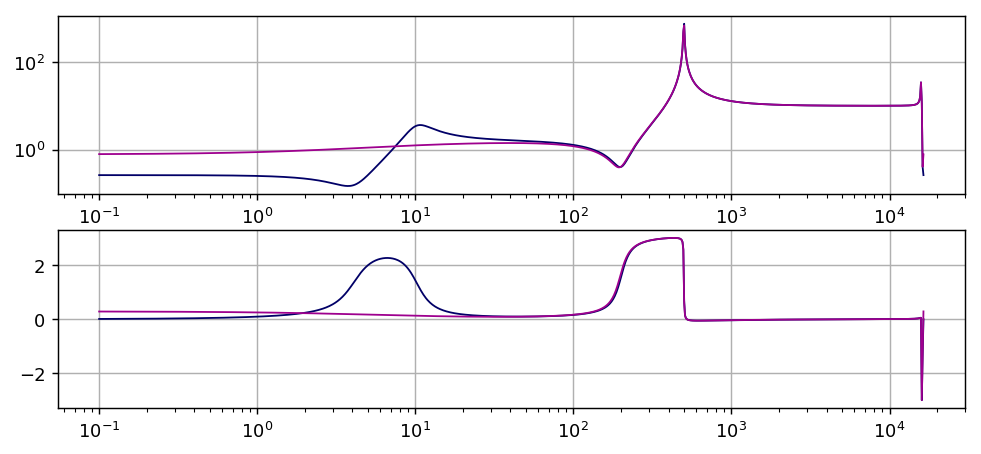

In [57]:
Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz(b, a, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

w, h = scipy.signal.freqz(b_fit, a_fit, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

In [23]:
if order_a == len(a):
    print(a_fit / a_fit[0] / (a / a[0]))
if order_b == len(b):
    print(b_fit / b_fit[0] / (b / b[0]))

In [24]:
S

array([  3.16293330e+03,   2.94779789e+02,   2.70481620e+02,
         2.09597890e+02,   1.74394072e+02,   1.52917042e+02,
         1.37868078e+02,   1.26432718e+02,   1.17392061e+02,
         1.10223638e+02,   1.05011188e+02,   1.71652337e+01,
         1.24891283e+00,   2.31687169e-03,   1.19784745e-13,
         8.41445113e-14,   4.06011681e-14,   2.20081177e-14,
         1.58268442e-14,   1.49045861e-14])

In [27]:
U,S,V = np.linalg.svd(X)
b_fit = V[-1, 0:order_b]
a_fit = V[-1, order_b:order_b + order_a]


In [25]:
if order_b == len(b):
    b_fit / b_fit[0] / (b / b[0])
if order_a == len(a):
    a_fit / a_fit[0] / (a / a[0])

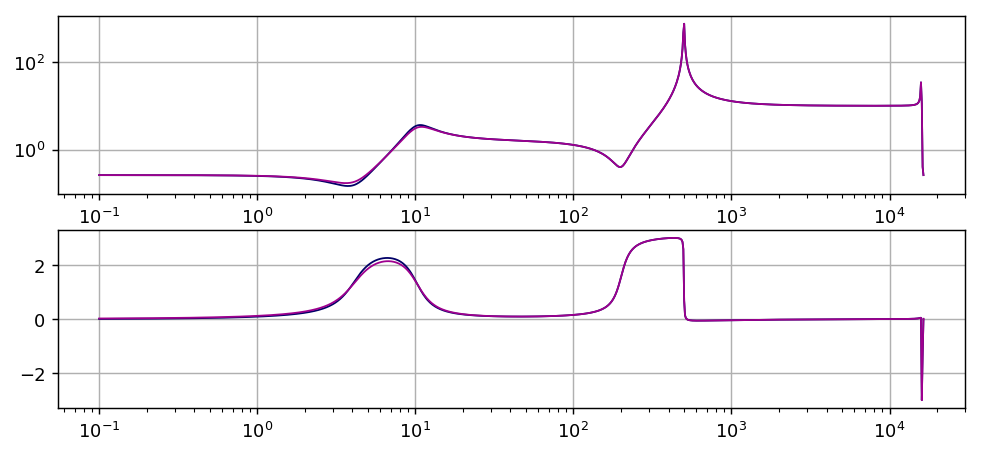

In [26]:
Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz(b, a, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

w, h = scipy.signal.freqz(b_fit, a_fit, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')